# Clusterização

## K-Means Clustering

In [2]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data = pd.read_csv('loja.csv')

In [39]:
data.head()

,IdCliente,Gênero,Idade,Renda Anual,Nivel de Gastos
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
data.set_index('IdCliente', inplace=True)

In [41]:
df = data[['Renda Anual', 'Nivel de Gastos']]

Text(0, 0.5, 'Nível de Gastos')

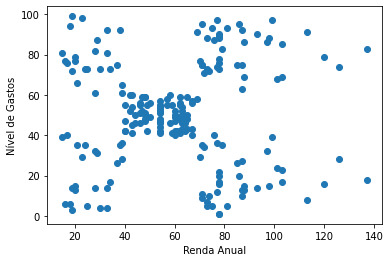

In [42]:
plt.scatter(df['Renda Anual'], df['Nivel de Gastos'])
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gastos')

# Identificar quantidade de Clusters
Método Elbow (Cotovelo)

In [45]:
from sklearn.cluster import KMeans

In [46]:
X = df.values

Text(0, 0.5, 'Variações')

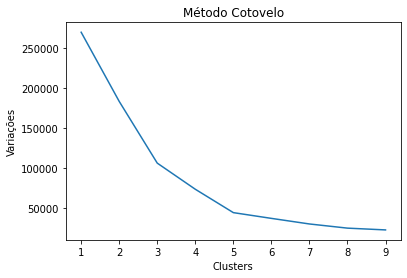

In [47]:
var = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    var.append(kmeans.inertia_)

plt.plot(range(1,10), var)
plt.title('Método Cotovelo')
plt.xlabel('Clusters')
plt.ylabel('Variações')

In [25]:
kmeans_final = KMeans(n_clusters=5)

In [26]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [27]:
cluster_pred = kmeans_final.predict(X)

In [28]:
cluster_centro = kmeans_final.cluster_centers_

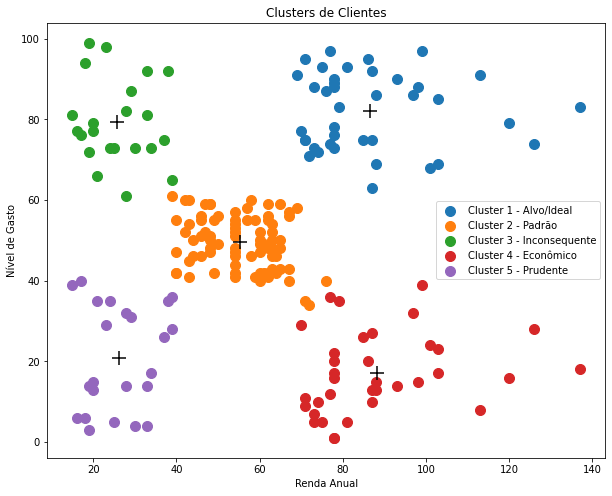

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1],s=100, label='Cluster 1 - Alvo/Ideal')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1],s=100, label='Cluster 2 - Padrão')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1],s=100, label='Cluster 3 - Inconsequente')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1],s=100, label='Cluster 4 - Econômico')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1],s=100, label='Cluster 5 - Prudente')
plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')
plt.show()